# **1. IMPORT LIBRARY**

In [2]:
import pandas as pd # Manipulasi Data
import numpy as np # Komputasi Matematika
from sklearn.model_selection import train_test_split # Membagi dataset (train, val, test)
from sklearn.preprocessing import QuantileTransformer # Standardisasi
from sklearn.metrics import classification_report, confusion_matrix # Metrik Akurasi
import matplotlib.pyplot as plt # Visualisasi Data
import seaborn as sns # Visualisasi Data
import tensorflow as tf # Library Neural Network
from tensorflow.keras.models import Sequential # Input Layer
from tensorflow.keras.layers import Dense, Dropout # Fully Connected Layer dan Dropout Layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # Callbacks

# **2. LOAD DATASET**

In [3]:
df = pd.read_csv("diabetes.csv") # Membuat dataframe dengan nama df
df.head() # Menampilkan 5 baris teratas dataframe df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **3. EXPLORATORY DATA ANALYSIS**

In [4]:
# Mengidentifikasi informasi dataset
print('INFORMASI DATASET:')
print(df.info())

INFORMASI DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
# Mengindentifikasi nilai statistik tiap kolom melalui deskripsi statistik
print('DESKRIPSI STATISTIK DATASET:')
print(df.describe())

DESKRIPSI STATISTIK DATASET:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min   

In [6]:
# Mengindentifikasi data yang null
print('JUMLAH DATA NULL:')
print(df.isnull().sum())

JUMLAH DATA NULL:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Mengindentifikasi data duplikat
print('JUMLAH DATA DUPLIKAT:')
print(df.duplicated().sum())

JUMLAH DATA DUPLIKAT:
0


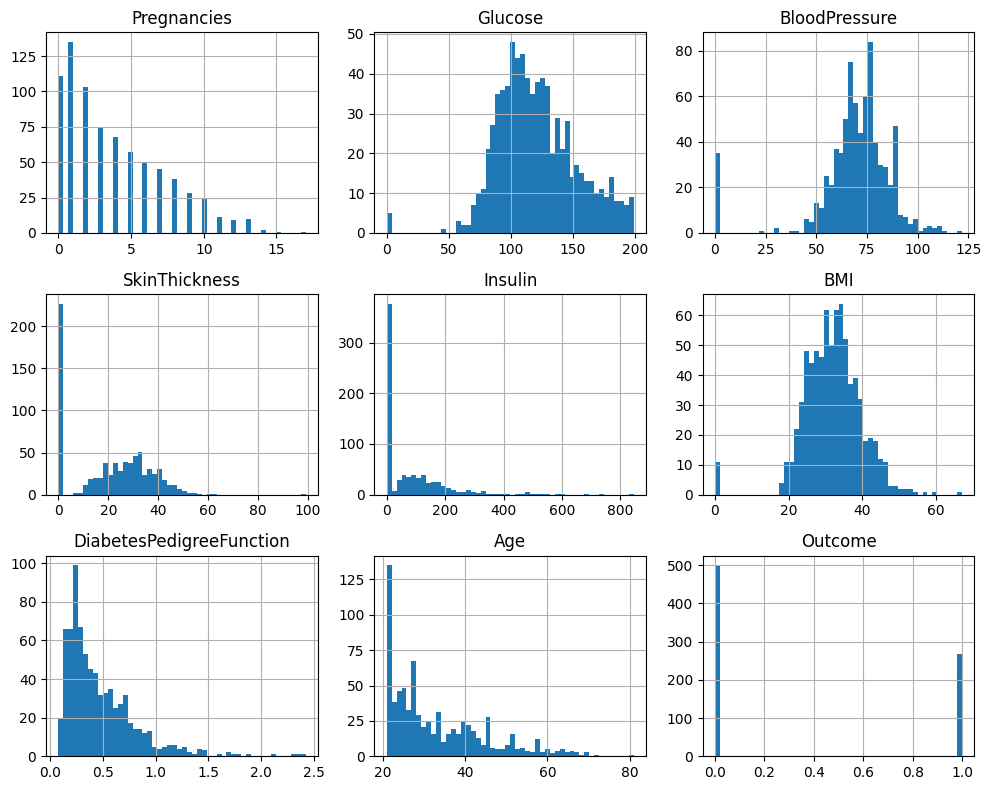

In [8]:
# Visualisasi Distribusi Tiap Kolom
df.hist(bins=50, figsize=(10, 8))
plt.tight_layout()
plt.show()

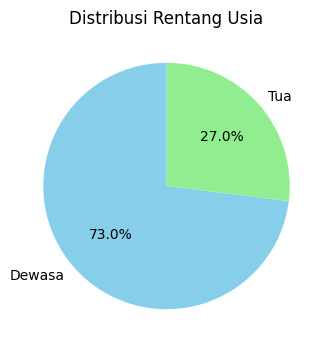


Jumlah Data per Kelompok Usia:
Age_Group
Dewasa    561
Tua       207
Name: count, dtype: int64


In [9]:
# Membuat fungsi untuk membagi tiga rentang usia (Remaja, Dewasa, Tua)
def categorize_age(age):
  if 0 < age < 18:
    return 'Remaja'
  elif 18 <= age < 40:
    return 'Dewasa'
  elif age >= 40:
    return 'Tua'

# Membuat kolom Age_Group
df['Age_Group'] = df['Age'].apply(categorize_age)

# Visualisasi Pie Chart Blood Pressure Category
age_group_counts = df['Age_Group'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribusi Rentang Usia')
plt.show()

print('\nJumlah Data per Kelompok Usia:')
print(df['Age_Group'].value_counts())

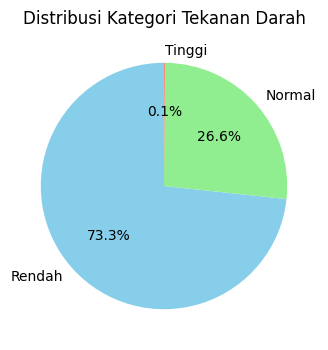


Jumlah Data per Kategori Tekanan Darah:
BloodPressure_Category
Rendah    563
Normal    204
Tinggi      1
Name: count, dtype: int64


In [10]:
# Membuat fungsi untuk membagi tiga tipe Blood Pressure (Rendah, Normal, Tinggi)
def categorize_blood_pressure(bp):
  if bp < 80:
    return 'Rendah'
  elif 80 <= bp < 120:
    return 'Normal'
  elif bp >= 120:
    return 'Tinggi'

# Membuat kolom BloodPressure_Category
df['BloodPressure_Category'] = df['BloodPressure'].apply(categorize_blood_pressure)

# Visualisasi Pie Chart Blood Pressure Category
blood_pressure_counts = df['BloodPressure_Category'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(blood_pressure_counts, labels=blood_pressure_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribusi Kategori Tekanan Darah')
plt.show()

print('\nJumlah Data per Kategori Tekanan Darah:')
print(df['BloodPressure_Category'].value_counts())

# **4. CLEANING DATA**

In [11]:
# Ubah nilai 0 pada bbrp kolom dengan nilai rata-rata masing-masing kolom
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_replace:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-11-450396700f1b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [14]:
df.drop('Age_Group', axis=1, inplace=True)
df.drop('BloodPressure_Category', axis=1, inplace=True)

In [15]:
# Membuat variabel cols berisikan semua kolom, kecuali Outcome
cols = df.columns.tolist()
cols.remove('Outcome')

# Identifikasi Outlier
def identify_outlier_iqr(data):
    outliers = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr # batas bawah
    upper_bound = q3 + 1.5 * iqr # batas atas
    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)
    return outliers

print('Sebelum Impute Outliers')
data_outlier = {} # Dictionary utk menyimpan nilai yg dianggap outlier
for col in cols:
    data_outlier[col] = identify_outlier_iqr(df[col])
    print('Outlier (' + col + '):', len(data_outlier[col]), 'outliers')

Sebelum Impute Outliers
Outlier (Pregnancies): 4 outliers
Outlier (Glucose): 0 outliers
Outlier (BloodPressure): 14 outliers
Outlier (SkinThickness): 87 outliers
Outlier (Insulin): 164 outliers
Outlier (BMI): 8 outliers
Outlier (DiabetesPedigreeFunction): 29 outliers
Outlier (Age): 9 outliers


In [16]:
# Fungsi untuk menangani outlier
def impute_outlier_iqr(df):
    Q1 = df.quantile(0.25) # Quartil 1
    Q3 = df.quantile(0.75) # Quartil 2
    IQR = Q3-Q1 # Interquartil
    lower_bound = Q1 - 1.5*IQR # Batas Bawah (BB)
    upper_bound = Q3 + 1.5*IQR # Batas Atas (BA)
    # Mengganti nilai outlier yg melebihi BA, dengan nilai BA
    df = np.where(df > upper_bound, upper_bound, df)
    # Mengganti nilai outlier yg kurang dari BB, dengan nilai BB
    df = np.where(df < lower_bound, lower_bound, df)
    return df

# Menerapkan fungsi ke semua kolom
for col in cols:
    df[col] = impute_outlier_iqr(df[col])

print('Setelah Drop Outliers')
data_outlier = {}
for col in cols:
    data_outlier[col] = identify_outlier_iqr(df[col])
    print('Outlier (' + col + '):', len(data_outlier[col]), 'outliers')

Setelah Drop Outliers
Outlier (Pregnancies): 0 outliers
Outlier (Glucose): 0 outliers
Outlier (BloodPressure): 0 outliers
Outlier (SkinThickness): 0 outliers
Outlier (Insulin): 0 outliers
Outlier (BMI): 0 outliers
Outlier (DiabetesPedigreeFunction): 0 outliers
Outlier (Age): 0 outliers


In [17]:
# Menentukan variabel X dan Y
X = df.drop('Outcome', axis=1) # Kolom selain 'Outcome'
y = df['Outcome'] # Hanya kolom 'Outcome'

# Quantile Transformer
scaler = QuantileTransformer()
X_scaled = scaler.fit_transform(X)

# Membagi dataset ke data train, data val, dan data test
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


In [20]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.0 MB/s eta 0:00:00


In [47]:
!rm -rf tuning_diabetes

In [48]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

# Membangun fungsi untuk percobaan mencari jumlah layer terbaik
def build_model(hp):
    model = Sequential()
    # Input Layer
    model.add(Dense(
        units=hp.Int('units_input', min_value=16, max_value=64, step=16),
        activation='relu',
        input_shape=(X_train.shape[1],)))
    # Layer Dropout 1
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.3, step=0.1)))
    # Hidden Layer
    model.add(Dense(
        units=hp.Int('units_hidden', min_value=8, max_value=16, step=8),
        activation='relu'))
    # Layer Dropout 2
    model.add(Dropout(hp.Float('dropout_2', 0.1, 0.3, step=0.1)))
    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Menggunakan optimizer Adam
    optimizer_choice = hp.Choice('optimizer', values=['adam'])
    if optimizer_choice == 'adam':
        opt = Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4]))

    model.compile(
        optimizer=opt,
        loss='binary_crossentropy',
        metrics=['accuracy']) # Metrik Akurasi

    return model

# Setup tuning
tuner = kt.RandomSearch(
    build_model, # Masukkan fungsi mencari jumlah layer terbaik
    objective='val_accuracy', # Akurasi pada data validation
    max_trials=10, # Jumlah Percobaan Tuning
    executions_per_trial=1, # Eksekusi Tiap Percobaan
    directory='tuning_diabetes', # Direktori File Hasil Tuning
    project_name='diabetes_model' # Nama File Tuning
)

# Menjalankan pencarian parameter
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=1)

# Mendapatkan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

print("\nBest Hyperparameters:")
for param in best_hps.values:
    print(f"{param}: {best_hps.values[param]}")

Trial 10 Complete [00h 00m 12s]
val_accuracy: 0.8024691343307495

Best val_accuracy So Far: 0.8086419701576233
Total elapsed time: 00h 02m 05s

Best Hyperparameters:
units_input: 32
dropout_1: 0.2
units_hidden: 16
dropout_2: 0.2
optimizer: adam
learning_rate: 0.001


In [49]:
# Buat model menggunakan dari hyperparameter tuning
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Ringkasan arsitektur
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Menerapkan callbacks untuk penghentian awal otomatis
EarlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Callbacks untuk menyimpan model yang dianggap terbaik
checkpoint = ModelCheckpoint(
    'best_model_diabetes.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [51]:
# Melakukan iterasi pada model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=5,
    callbacks=[EarlyStopping, checkpoint],
    verbose=1
)

Epoch 1/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6275 - loss: 0.6745
Epoch 1: val_loss improved from inf to 0.65995, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6266 - loss: 0.6748 - val_accuracy: 0.6667 - val_loss: 0.6600
Epoch 2/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - loss: 0.6651
Epoch 2: val_loss improved from 0.65995 to 0.64201, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6462 - loss: 0.6645 - val_accuracy: 0.6420 - val_loss: 0.6420
Epoch 3/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6611 - loss: 0.6450
Epoch 3: val_loss improved from 0.64201 to 0.61293, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6612 - loss: 0.6447 - val_accuracy: 0.6481 - val_loss: 0.6129
Epoch 4/20
65/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7150 - loss: 0.6154
Epoch 4: val_loss improved from 0.61293 to 0.58567, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7112 - loss: 0.6165 - val_accuracy: 0.6852 - val_loss: 0.5857
Epoch 5/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - loss: 0.6043
Epoch 5: val_loss improved from 0.58567 to 0.55613, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6875 - loss: 0.6042 - val_accuracy: 0.7037 - val_loss: 0.5561
Epoch 6/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - loss: 0.5672
Epoch 6: val_loss improved from 0.55613 to 0.52725, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6963 - loss: 0.5676 - val_accuracy: 0.7284 - val_loss: 0.5273
Epoch 7/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7344 - loss: 0.5512
Epoch 7: val_loss improved from 0.52725 to 0.50981, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7330 - loss: 0.5513 - val_accuracy: 0.7284 - val_loss: 0.5098
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7517 - loss: 0.5328
Epoch 8: val_loss improved from 0.50981 to 0.47575, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7516 - loss: 0.5329 - val_accuracy: 0.7593 - val_loss: 0.4757
Epoch 9/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7696 - loss: 0.5222
Epoch 9: val_loss did not improve from 0.47575
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7686 - loss: 0.5226 - val_accuracy: 0.7284 - val_loss: 0.4867
Epoch 10/20
69/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7399 - loss: 0.5221
Epoch 10: val_loss improved from 0.47575 to 0.46032, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7416 - loss: 0.5208 - val_accuracy: 0.7346 - val_loss: 0.4603
Epoch 11/20
67/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.4758
Epoch 11: val_loss improved from 0.46032 to 0.44451, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7848 - loss: 0.4797 - val_accuracy: 0.8025 - val_loss: 0.4445
Epoch 12/20
68/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7618 - loss: 0.4961
Epoch 12: val_loss did not improve from 0.44451
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7610 - loss: 0.4983 - val_accuracy: 0.7963 - val_loss: 0.4445
Epoch 13/20
70/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 0.4985
Epoch 13: val_loss improved from 0.44451 to 0.43734, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7712 - loss: 0.4992 - val_accuracy: 0.7901 - val_loss: 0.4373
Epoch 14/20
73/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7222 - loss: 0.5213
Epoch 14: val_loss improved from 0.43734 to 0.43629, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7226 - loss: 0.5208 - val_accuracy: 0.7901 - val_loss: 0.4363
Epoch 15/20
69/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7640 - loss: 0.4722
Epoch 15: val_loss improved from 0.43629 to 0.43206, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7615 - loss: 0.4746 - val_accuracy: 0.7901 - val_loss: 0.4321
Epoch 16/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7792 - loss: 0.4470
Epoch 16: val_loss did not improve from 0.43206
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7779 - loss: 0.4482 - val_accuracy: 0.7778 - val_loss: 0.4338
Epoch 17/20
62/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7473 - loss: 0.4506
Epoch 17: val_loss did not improve from 0.43206
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7456 - loss: 0.4562 - val_accuracy: 0.7778 - val_loss: 0.4366
Epoch 18/20
70/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7353 - loss: 0.5089
Epoch 18: val_loss did not improve from 0.43206
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7389 - loss: 0.5057 - val_accuracy: 0.7778 - val_loss: 0.4344
Epoch 19/20
71/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7777 - loss: 0.4588
Epoch 19: val_loss improved from 0.43206 to 0.42641, sav

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7773 - loss: 0.4595 - val_accuracy: 0.7593 - val_loss: 0.4264
Epoch 20/20
74/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7499 - loss: 0.4918
Epoch 20: val_loss improved from 0.42641 to 0.41834, saving model to best_model_diabetes.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7505 - loss: 0.4914 - val_accuracy: 0.8086 - val_loss: 0.4183


In [52]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nAkurasi pada data uji: {accuracy:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7156 - loss: 0.5252 

Akurasi pada data uji: 0.71


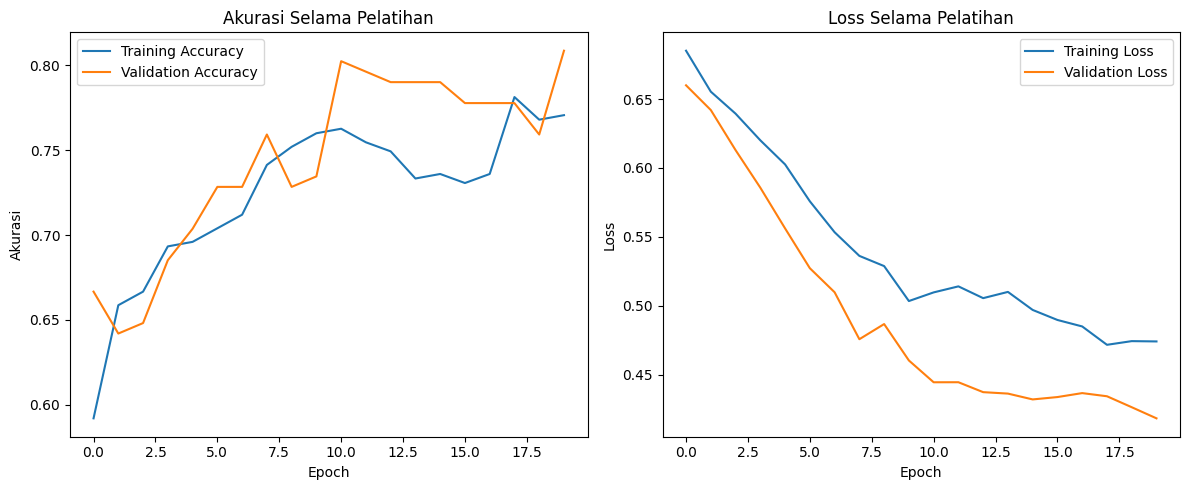

In [53]:
# Visualisasi Accuracy pada data training dan data validation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Visualisasi Loss pada data training dan data validation
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
# Melakukan prediksi dengan data test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


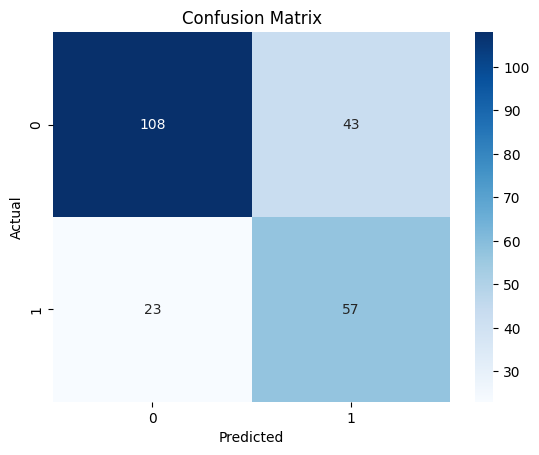


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       151
           1       0.57      0.71      0.63        80

    accuracy                           0.71       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.74      0.71      0.72       231



In [55]:
# Melihat nilai akurasi dengan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [56]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model_diabetes.h5')

# Prepare new data for inference (replace with your actual new data)
# Assuming new_data is a pandas DataFrame with the same columns as the training data, excluding 'Outcome'
new_data = pd.DataFrame({
    'Pregnancies': [0, 3, 5, 2, 10],
    'Glucose': [85, 140, 180, 130, 190],
    'BloodPressure': [66, 80, 74, 72, 130],
    'SkinThickness': [29, 35, 0, 25, 15],
    'Insulin': [0, 130, 200, 90, 100],
    'BMI': [26.6, 35.0, 45.3, 30.1, 20.1],
    'DiabetesPedigreeFunction': [0.351, 0.672, 1.201, 0.134, 0.841],
    'Age': [25, 40, 50, 33, 39]
})

# Scale the new data using the same scaler fitted on the training data
new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions = best_model.predict(new_data_scaled)

# Convert probabilities to binary predictions (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

print("\nInference Results:")
for i in range(len(new_data)):
  print(f"Data Point {i+1}:")
  print(f"  Original Data: {new_data.iloc[i].to_dict()}")
  print(f"  Predicted Probability of Diabetes: {predictions[i][0]:.4f}")
  print(f"  Predicted Class (0: No Diabetes, 1: Diabetes): {predicted_classes[i][0]}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Inference Results:
Data Point 1:
  Original Data: {'Pregnancies': 0.0, 'Glucose': 85.0, 'BloodPressure': 66.0, 'SkinThickness': 29.0, 'Insulin': 0.0, 'BMI': 26.6, 'DiabetesPedigreeFunction': 0.351, 'Age': 25.0}
  Predicted Probability of Diabetes: 0.0597
  Predicted Class (0: No Diabetes, 1: Diabetes): 0
Data Point 2:
  Original Data: {'Pregnancies': 3.0, 'Glucose': 140.0, 'BloodPressure': 80.0, 'SkinThickness': 35.0, 'Insulin': 130.0, 'BMI': 35.0, 'DiabetesPedigreeFunction': 0.672, 'Age': 40.0}
  Predicted Probability of Diabetes: 0.7525
  Predicted Class (0: No Diabetes, 1: Diabetes): 1
Data Point 3:
  Original Data: {'Pregnancies': 5.0, 'Glucose': 180.0, 'BloodPressure': 74.0, 'SkinThickness': 0.0, 'Insulin': 200.0, 'BMI': 45.3, 'DiabetesPedigreeFunction': 1.201, 'Age': 50.0}
  Predicted Probability of Diabetes: 0.8187
  Predicted Class (0: No Diabetes, 1: Diabetes): 1
Data Point 4:
  Original Data: {'Pregnancies': 2.0, 'Glucose': 130.0, 'Blood